In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_pickle('consolidado.pkl')
df

,search_title,shuffle_id,true_class,response_sem_rag,response_com_rag,response_com_rag_e_ner,response_tom,response_noticia_completa
0,Supreme Court Justice Ginsburg 'regrets' Trump...,0,real,fake,real,real,real,real
1,DOZENS Of GOP Foreign Policy Experts Pledge T...,1,fake,fake,fake,fake,fake,None
2,REPORT: Trump Laughed After Woman Was Grabbed...,2,fake,fake,fake,fake,fake,None
3,"In North Dakota, Trump finds Democrat willing ...",3,real,fake,real,real,real,-
4,"Flash floods kill five in Malaysia, army deplo...",4,real,real,fake,real,real,None
...,...,...,...,...,...,...,...,...
1995,Conservative Texas Lt. Governor Tweets Vile B...,573,fake,real,real,real,fake,None
1996,HILLARY THROWS HER WEALTH AND STATUS Into The ...,594,fake,fake,fake,fake,fake,None
1997,TOLD TO SURRENDER: Former Trump Campaign Manag...,609,fake,fake,fake,fake,fake,None
1998,Trump BEGGED This Singer To Perform At His In...,623,fake,fake,fake,fake,fake,None


Text(0.5, 36.72222222222221, 'LLM Output')

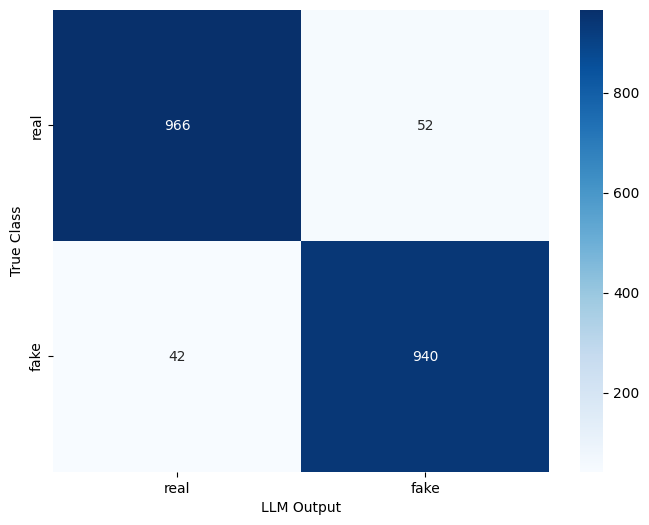

In [18]:
cols = ['response_sem_rag', 'response_com_rag_e_ner', 'response_tom']
df['response_final'] = df[cols].apply(
    lambda row: 'fake' if (row == 'fake').sum() > (row == 'real').sum() else 'real',
    axis=1
)

y_true = df['true_class']
y_pred = df['response_final']

cm = confusion_matrix(y_true, y_pred, labels=y_true.unique())
cm_df = pd.DataFrame(cm, index=y_true.unique(), columns=y_true.unique())

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Class')
plt.xlabel('LLM Output')

In [19]:
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
fake,0.947581,0.957230,0.952381,982.000
real,0.958333,0.948919,0.953603,1018.000
accuracy,0.953000,0.953000,0.953000,0.953
macro avg,0.952957,0.953075,0.952992,2000.000
weighted avg,0.953054,0.953000,0.953003,2000.000
